desenvolva um c odigo de repetição para proteger do erro de phase-flip. 
Analise a proteção em função do número de qubits físicos usados para codificar o qubit lógico.

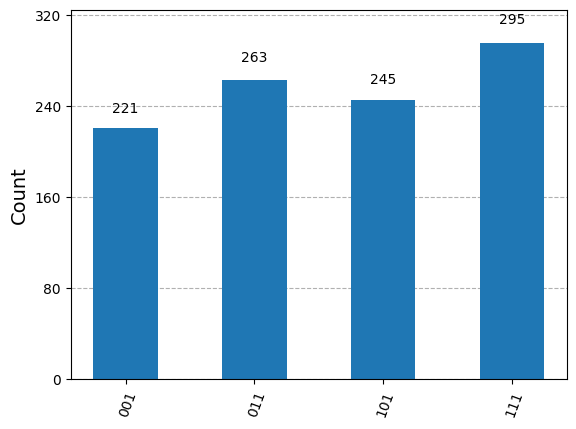

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# Configuração para exibir gráficos diretamente no Jupyter Notebook
%matplotlib inline

def repetition_code_circuit():
    # Criação do circuito quântico
    qc = QuantumCircuit(3, 3)
    
    # Codificação do qubit lógico |0_L> ou |1_L>
    # Aqui codificamos o estado |0_L> = |000>
    
    # Aplicando uma operação de flip de fase (Z gate) em um qubit de dados
    qc.x(0)  # Estado inicial como |1_L>
    
    # Aplicação de correção de erros
    qc.h(1)  # Aplicando uma Hadamard no qubit 1
    qc.cx(0, 1)  # CNOT entre qubit 0 e qubit 1
    qc.cx(1, 2)  # CNOT entre qubit 1 e qubit 2
    qc.h(1)  # Aplicando Hadamard novamente no qubit 1
    
    # Medição para detectar erros
    qc.measure([0, 1, 2], [0, 1, 2])
    
    return qc

def run_simulation(circuit):
    # Simulador de backend
    simulator = AerSimulator()
    
    # Compilação do circuito
    compiled_circuit = transpile(circuit, simulator)
    
    # Execução do circuito
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts(circuit)
    
    return counts

# Criação e execução do circuito
circuit = repetition_code_circuit()
results = run_simulation(circuit)

# Visualização dos resultados
plot_histogram(results)


Considerando o código de repetição com 3 qubits f ısicos, mostre que o algoritmo também é eficiente para proteger o estado |ψ⟩L = 1√2(|0⟩ + |1⟩)

In [17]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Função para criar o circuito para codificar o estado lógico |ψ⟩L
def encode_state(circuit):
    # Aplicar a porta Hadamard ao qubit de entrada
    circuit.h(0)
    # Repetir o estado |0⟩L = |000⟩ e |1⟩L = |111⟩
    circuit.barrier()
    # Aplicar a operação CNOT para codificar |0⟩L
    circuit.cx(0, 1)
    circuit.cx(0, 2)
    return circuit

# Função para aplicar erros aos qubits físicos
def apply_errors(circuit):
    # Aplicar erros de bit flip (X) ou phase flip (Z) aos qubits físicos
    circuit.x(0)  # Exemplo: aplicar um erro X no primeiro qubit
    return circuit

# Função para decodificar o estado lógico
def decode_state(circuit):
    # Corrigir os erros aplicando portas de correção de erros
    circuit.barrier()
    circuit.cx(1, 0)
    circuit.cx(2, 0)
    circuit.h(0)
    return circuit

# Função principal para a simulação
def main():
    # Criar o circuito quântico
    circuit = QuantumCircuit(3, 3)
    
    # Codificar o estado lógico
    circuit = encode_state(circuit)
    
    # Aplicar erros
    circuit = apply_errors(circuit)
    
    # Decodificar o estado
    circuit = decode_state(circuit)
    
    # Medir os qubits
    circuit.measure([0,1,2], [0,1,2])
    
    # Usar o AerSimulator
    simulator = AerSimulator()
    # Executar a simulação
    result = simulator.run(circuit, shots=2024).result()
    counts = result.get_counts(circuit)
    
    # Plotar o resultado
    plot_histogram(counts)
    print(counts)

# Executar a função principal
main()


{'111': 542, '001': 486, '110': 520, '000': 476}
